In [3]:
#Loading the dataset
import pandas as pd
gold_data = pd.read_csv("gold_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,05-08-2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,05-09-2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,05-10-2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01-02-2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01-03-2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01-04-2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01-07-2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01-08-2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#getting the basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing values
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
#Splitting the features and target
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']

print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [18]:
#Splitting into training data and test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [21]:
#Model Training
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

regressor.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
#Model Evaluation

#Prediction on test data
test_data_prediction=regressor.predict(x_test)
print(test_data_prediction)

[168.6333994   81.76919985 116.10540001 127.58870088 120.74640105
 154.8003984  150.03299837 126.16600013 117.37469876 125.80870141
 116.6378006  172.04130092 142.16179873 167.80079889 115.2189002
 117.64810034 138.80450258 170.01880043 159.75950295 157.91919984
 155.13869988 125.22030036 176.00560037 156.93240344 125.17950023
  93.7560997   77.04740048 120.31870004 119.17589965 167.44420038
  88.16740068 125.1646997   91.19640057 117.58680002 121.1470995
 136.17260044 115.48270139 114.84260082 147.94269944 107.15020108
 104.20590259  87.14749787 126.52450076 117.93320049 152.81869891
 119.71950011 108.38269966 108.0568983   93.1650007  127.02349819
  74.8617003  113.6955995  121.15469985 111.28339894 118.92869907
 120.62139979 160.08510152 168.03390061 147.15869672  85.83409875
  94.39850026  86.84449884  90.52840044 119.03960082 126.46110029
 127.5893003  169.59120005 122.32599955 117.32869894  98.30400039
 168.36960017 142.94469858 132.3678025  120.99320214 121.15559934
 119.7040005

In [27]:
#R squared error (to compare the predicted values with actual values)
from sklearn import metrics
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error for test data:", error_score)

R squared error for test data: 0.9893959550238012


In [24]:
#Prediction on train data
train_data_prediction=regressor.predict(x_train)
print(train_data_prediction)

[109.793198   114.93640085  90.67440001 ... 131.08229714 159.57139572
 114.57379984]


In [26]:
#R squared error (to compare the predicted values with actual values)
error_score = metrics.r2_score(y_train,train_data_prediction)
print("R squared error for train data:", error_score)

R squared error for train data: 0.9984955200093641


458 458


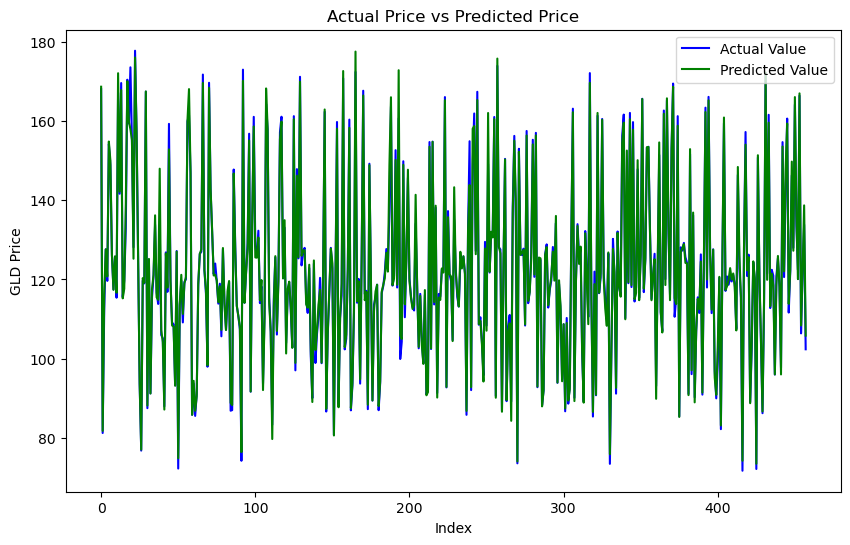

In [33]:
# Convert to lists (if not already)
y_test = list(y_test)
test_data_prediction = list(test_data_prediction)

# Make sure both have the same length
print(len(y_test), len(test_data_prediction))  # should be equal


# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual Value', color='blue')
plt.plot(test_data_prediction, label='Predicted Value', color='green')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Index')
plt.ylabel('GLD Price')
plt.legend()
plt.show()